# Data Visualization with Matplotlib and Seaborn

## Why Data Visualization Matters

Data visualization converts **raw numbers into clear insights**. A well-designed chart reveals patterns instantly that would take minutes to find in spreadsheets. Key benefits include:[2][6][10]

- **Pattern Recognition**: Identify trends, correlations, and outliers quickly
- **Better Decisions**: Present clear evidence for informed choices
- **Effective Communication**: Bridge technical analysis and business understanding
- **Data Exploration**: Discover relationships and generate new insights[

## Matplotlib: Complete Control

Matplotlib is Python's foundational plotting library. It provides precise control over every visualization element.

**Strengths**:

- Full customization of plots and styling
- Professional, publication-ready graphics
- Wide range of chart types
- Foundation for other visualization libraries

**Use when**: You need custom designs or complex multi-panel figures.

## Seaborn: Statistical Power

Seaborn builds on Matplotlib for beautiful statistical visualizations with less code.

**Strengths**:

- Built-in statistical analysis tools
- Professional color schemes by default
- Simple syntax for complex plots
- Easy integration with Pandas DataFrames
- 
**Use when**: You need statistical analysis or quick, elegant plots.

## The Dataset

We'll use the **Albania House Prices** dataset with property listings including zone, size, type, and price. Through practical examples, you'll learn to create visualizations that reveal real estate market patterns.

In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Read the dataset
df = pd.read_csv('datasets/albania_house_prices.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (99, 8)

First 5 rows:


,Zone,Property_Type,Size_m2,Rooms,Floor,Age_Years,Has_Parking,Price_EUR
0,Tirana-Center,Apartment,85.0,2,3,5.0,Yes,95000.0
1,Tirana-Center,Apartment,120.0,3,5,8.0,Yes,135000.0
2,Tirana-Suburb,Apartment,95.0,2,2,3.0,No,75000.0
3,Durres,House,180.0,4,0,15.0,Yes,145000.0
4,Vlore,Apartment,70.0,1,1,2.0,No,65000.0


## What We'll Discover

Through this tutorial, we'll use visualization to answer key questions about the Albania real estate market:

1. **Distribution Analysis**: How are property prices distributed across the market?
2. **Market Composition**: What types of properties dominate the market?
3. **Price Relationships**: How does property size correlate with price?
4. **Location Impact**: Which zones command premium prices?
5. **Age Effects**: How does property age influence value?ence value?

###  Price Distribution

Understand how properties are distributed across price ranges to identify the market's sweet spot. 

> A histogram groups continuous data into bins and shows frequency.

This reveals whether the market is concentrated in affordable, mid-range, or luxury segments.

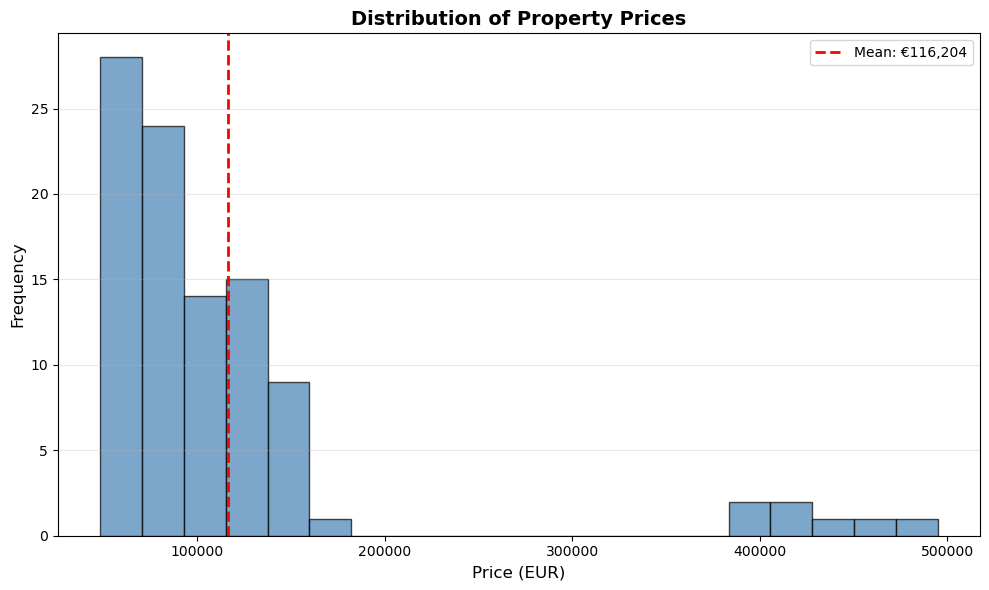

Mean Price: €116,204
Median Price: €84,500
Price Range: €48,000 - €495,000


In [5]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price_EUR'], bins=20, color='steelblue', edgecolor='black', alpha=0.7)

# Customize
plt.xlabel('Price (EUR)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Property Prices', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add mean line
mean_price = df['Price_EUR'].mean()
plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: €{mean_price:,.0f}')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Mean Price: €{mean_price:,.0f}")
print(f"Median Price: €{df['Price_EUR'].median():,.0f}")
print(f"Price Range: €{df['Price_EUR'].min():,.0f} - €{df['Price_EUR'].max():,.0f}")

> Most properties cluster in the €70,000-€130,000 range, with luxury outliers above €300,000.

### Property Type Breakdown

Our goal is to visualize the market composition by property type to understand which categories dominate.

> A pie chart shows proportions as slices of a circle.

This is perfect for categorical data where we want to see percentage distribution across a small number of categories.

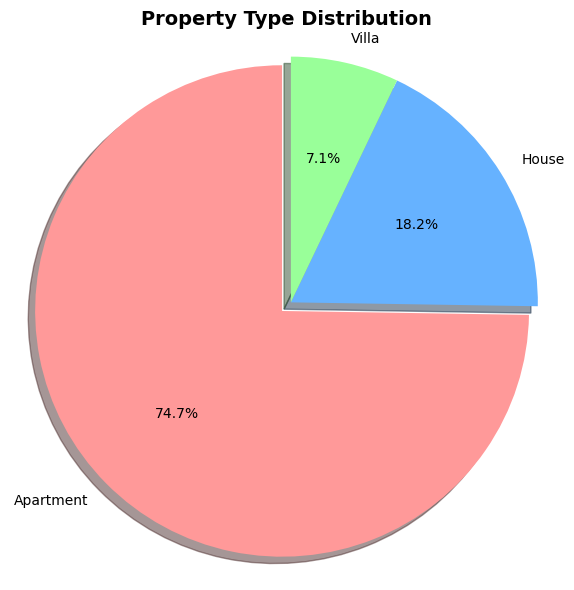

Property Type Breakdown:
Property_Type
Apartment    74
House        18
Villa         7
Name: count, dtype: int64

Total Properties: 99


In [8]:
# Calculate property type counts
property_counts = df['Property_Type'].value_counts()

# Create pie chart
plt.figure(figsize=(6, 6))
colors = ['#FF9999', '#66B2FF', '#99FF99']
explode = (0.05, 0, 0)  # Explode the largest slice

plt.pie(property_counts, labels=property_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, explode=explode, shadow=True)

plt.title('Property Type Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures circular pie

plt.tight_layout()
plt.show()

print("Property Type Breakdown:")
print(property_counts)
print(f"\nTotal Properties: {len(df)}")


> Apartments dominate the market, representing the majority of listings, while villas are rare premium offerings.

### Average Price by Zone

Our goal is to compare property prices across different locations to identify premium and affordable zones

> A bar chart displays categorical data with rectangular bars

Heights represent values, making it easy to compare average prices across the five zones.

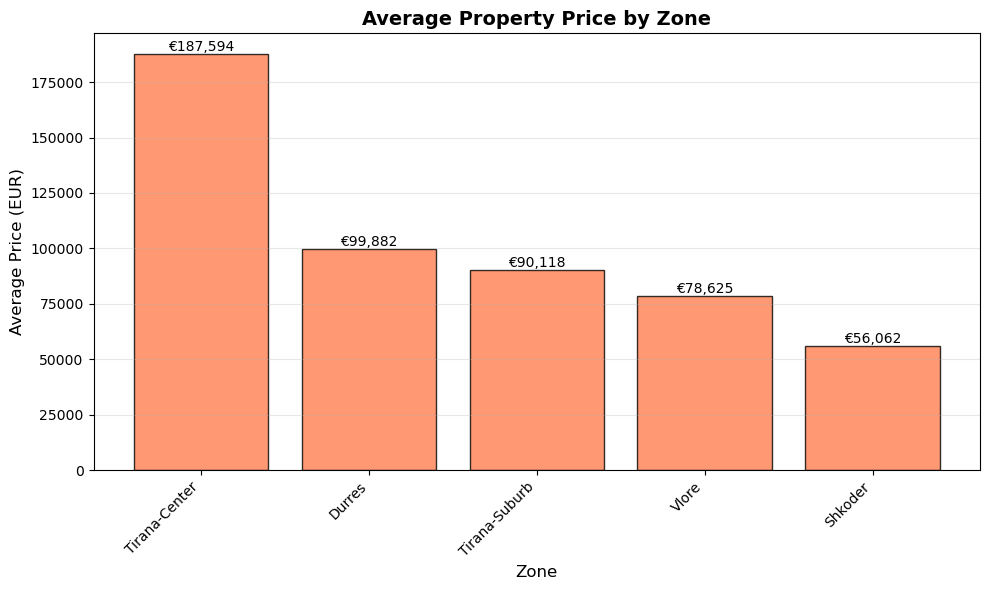

Average Price by Zone:
Zone
Tirana-Center    €187,594
Durres            €99,882
Tirana-Suburb     €90,118
Vlore             €78,625
Shkoder           €56,062
Name: Price_EUR, dtype: object


In [11]:
# Calculate average price by zone
avg_price_by_zone = df.groupby('Zone')['Price_EUR'].mean().sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_price_by_zone.index, avg_price_by_zone.values, 
               color='coral', edgecolor='black', alpha=0.8)

# Customize
plt.xlabel('Zone', fontsize=12)
plt.ylabel('Average Price (EUR)', fontsize=12)
plt.title('Average Property Price by Zone', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'€{height:,.0f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("Average Price by Zone:")
print(avg_price_by_zone.apply(lambda x: f"€{x:,.0f}"))


### Price vs Size

Our goal is to explore the relationship between property size and price to identify correlation and outliers.

> A scatter plot displays individual data points on two axes

Each point represents a property, revealing patterns, trends, and unusual values in the size-price relationship.

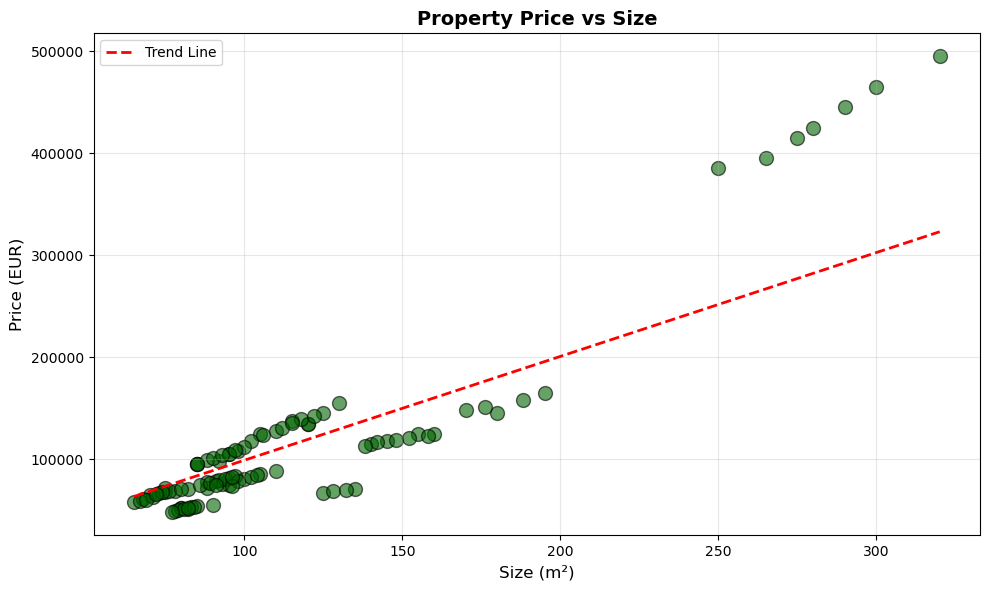

Correlation between Size and Price: 0.938
Interpretation: Strong positive relationship


In [13]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Size_m2'], df['Price_EUR'], c='darkgreen', alpha=0.6, 
            edgecolors='black', s=100)

# Customize
plt.xlabel('Size (m²)', fontsize=12)
plt.ylabel('Price (EUR)', fontsize=12)
plt.title('Property Price vs Size', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['Size_m2'].dropna(), df['Price_EUR'].dropna(), 1)
p = np.poly1d(z)
plt.plot(df['Size_m2'].sort_values(), p(df['Size_m2'].sort_values()), 
         "r--", linewidth=2, label='Trend Line')

plt.legend()
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df['Size_m2'].corr(df['Price_EUR'])
print(f"Correlation between Size and Price: {correlation:.3f}")
print(f"Interpretation: {'Strong' if abs(correlation) > 0.7 else 'Moderate'} positive relationship")


> Larger properties command higher prices with a strong positive correlation. Outliers above the trend line represent luxury villas in premium locations.

### Price Trends by Age

Our goal is to analyze how property age affects pricing to understand depreciation or premium for new construction.

> A line plot connects data points with lines

It is ideal for showing trends over continuous variables. Here we track how average price changes as properties age.

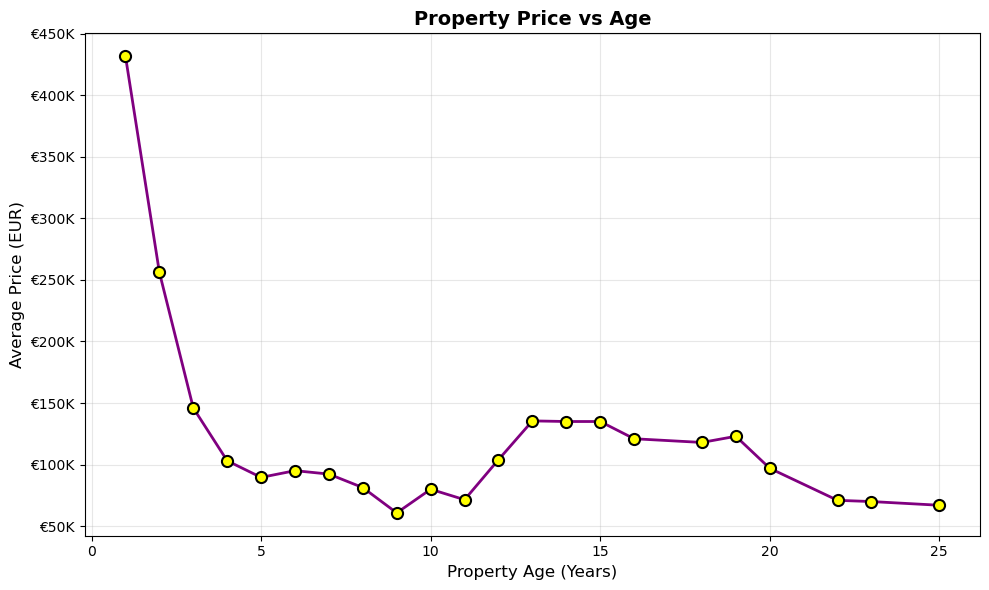

Newest properties (1-5 years): €156,784
Older properties (15+ years): €103,400


In [16]:
# Calculate average price by age (remove missing values)
price_by_age = df.groupby('Age_Years')['Price_EUR'].mean().sort_index()

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(price_by_age.index, price_by_age.values, marker='o', 
         linewidth=2, markersize=8, color='purple', markerfacecolor='yellow', 
         markeredgecolor='black', markeredgewidth=1.5)

# Customize
plt.xlabel('Property Age (Years)', fontsize=12)
plt.ylabel('Average Price (EUR)', fontsize=12)
plt.title('Property Price vs Age', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Format y-axis as currency
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x/1000:.0f}K'))

plt.tight_layout()
plt.show()

print(f"Newest properties (1-5 years): €{df[df['Age_Years'] <= 5]['Price_EUR'].mean():,.0f}")
print(f"Older properties (15+ years): €{df[df['Age_Years'] >= 15]['Price_EUR'].mean():,.0f}")


> Newer properties command premium prices. Older properties show depreciation, though location and type create variability in the trend.

### Price Distribution by Property Type

Compare price ranges and identify outliers across Apartments, Houses, and Villas using statistical summaries.

> A box plot displays the five-number summary (min, Q1, median, Q3, max) and outliers.

The box shows the interquartile range (middle 50% of data), making it perfect for comparing distributions across categories.

C:\Users\evisp\AppData\Local\Temp\ipykernel_2084\3271918656.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Property_Type', y='Price_EUR', palette='Set2')


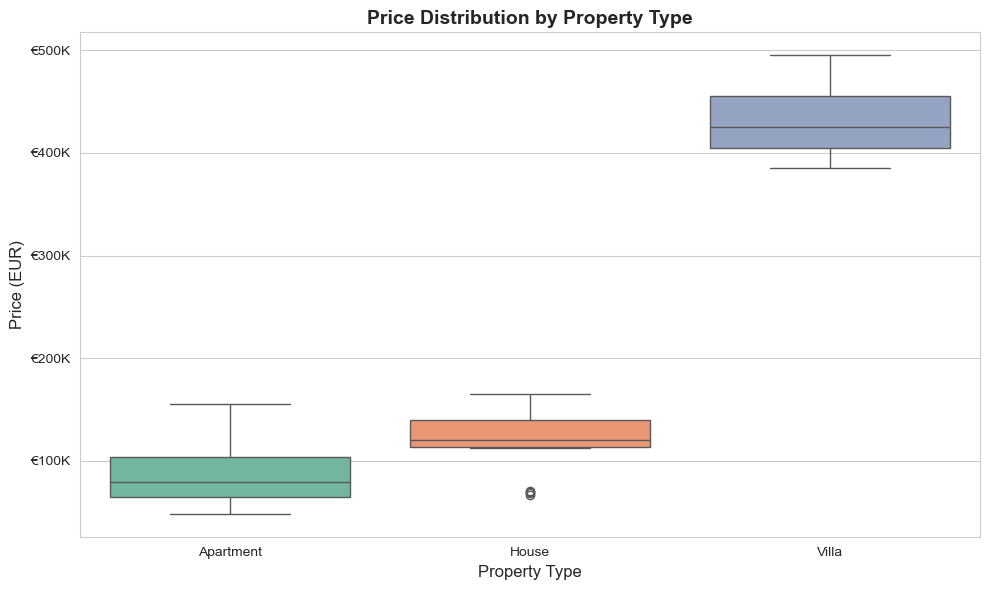

Price Statistics by Property Type:
                        mean       50%       min       max
Property_Type                                             
Apartment       85520.547945   79000.0   48000.0  155000.0
House          117777.777778  120000.0   67000.0  165000.0
Villa          432142.857143  425000.0  385000.0  495000.0


In [19]:
# Set seaborn style
sns.set_style("whitegrid")

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Property_Type', y='Price_EUR', palette='Set2')

# Customize
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Price (EUR)', fontsize=12)
plt.title('Price Distribution by Property Type', fontsize=14, fontweight='bold')

# Format y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x/1000:.0f}K'))

plt.tight_layout()
plt.show()

# Print statistics
print("Price Statistics by Property Type:")
print(df.groupby('Property_Type')['Price_EUR'].describe()[['mean', '50%', 'min', 'max']])


> Villas have the highest median price and largest range. Apartments show tight clustering with few outliers, while Houses fall in the middle range.

###  Price Distribution by Zone

We will visualize the full price distribution shape for each zone

> A violin plot merges a box plot with a kernel density plot. The width shows data density at different price levels, revealing distribution shapes that box plots alone cannot capture.

C:\Users\evisp\AppData\Local\Temp\ipykernel_2084\821942103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Zone', y='Price_EUR', palette='muted', inner='quartile')


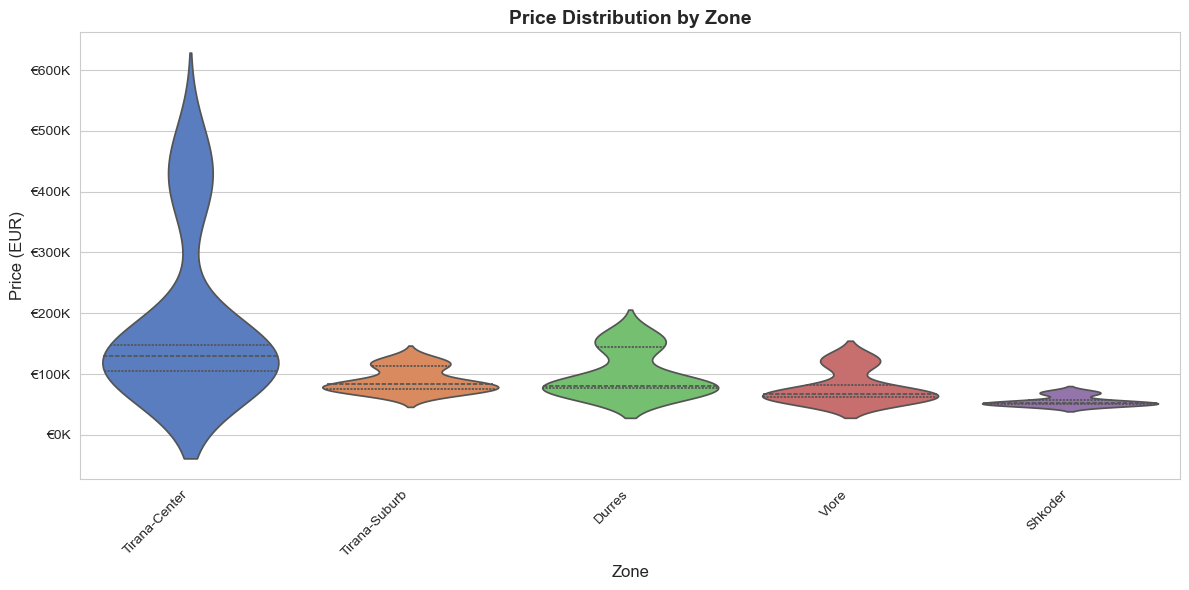

Median Price by Zone:
Zone
Tirana-Center    €129,500
Tirana-Suburb     €83,000
Durres            €81,000
Vlore             €66,500
Shkoder           €52,500
Name: Price_EUR, dtype: object


In [23]:
# Create violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Zone', y='Price_EUR', palette='muted', inner='quartile')

# Customize
plt.xlabel('Zone', fontsize=12)
plt.ylabel('Price (EUR)', fontsize=12)
plt.title('Price Distribution by Zone', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Format y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x/1000:.0f}K'))

plt.tight_layout()
plt.show()

# Print summary
print("Median Price by Zone:")
print(df.groupby('Zone')['Price_EUR'].median().sort_values(ascending=False).apply(lambda x: f"€{x:,.0f}"))


> Tirana-Center shows a wide, multi-modal distribution with luxury properties creating upper peaks. Budget zones like Shkoder have narrow, concentrated distributions at lower price points.

### Correlation Matrix

We will identify relationships between numerical variables to understand which factors most influence property prices.

> A  heatmap uses color intensity to represent correlation coefficients between variables. Values range from -1 (negative correlation) to +1 (positive correlation), with 0 indicating no relationship.


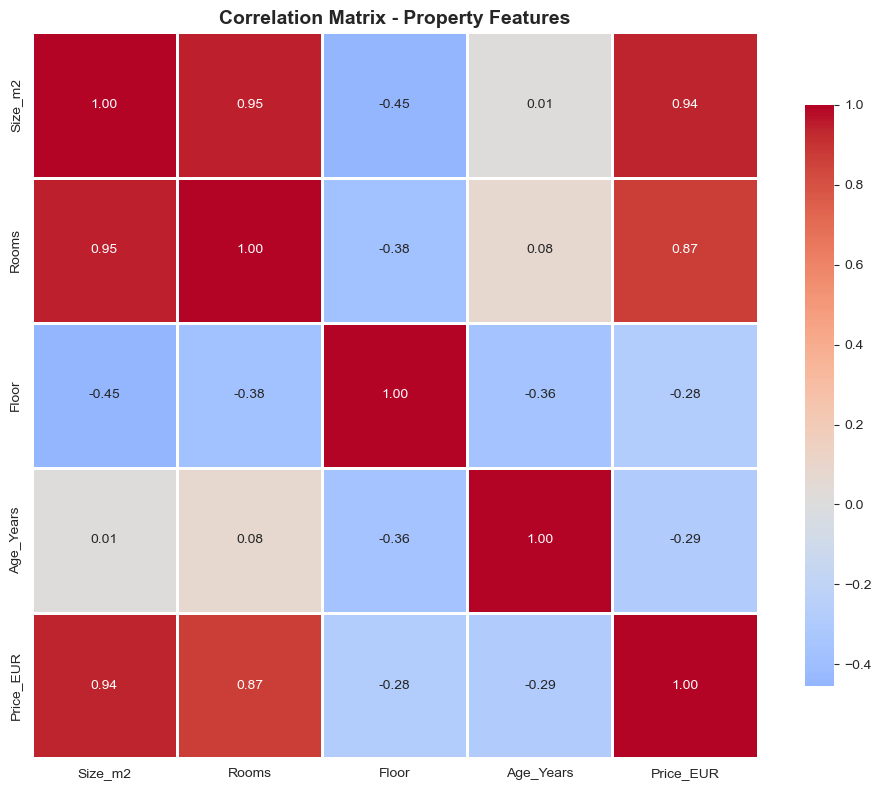

Correlations with Price (sorted by strength):
Size_m2      0.937889
Rooms        0.866572
Floor       -0.284860
Age_Years   -0.292123
Name: Price_EUR, dtype: float64


In [26]:
# Select numerical columns and handle missing values
numerical_cols = ['Size_m2', 'Rooms', 'Floor', 'Age_Years', 'Price_EUR']
df_numeric = df[numerical_cols].dropna()

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})

# Customize
plt.title('Correlation Matrix - Property Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print strongest correlations with Price
print("Correlations with Price (sorted by strength):")
price_corr = correlation_matrix['Price_EUR'].drop('Price_EUR').sort_values(ascending=False)
print(price_corr)


### Property Distribution by Zone and Type

We will visualize how property types are distributed across different zones to understand market composition by location.

> A count plot displays frequency counts for categorical variables. With hue (color grouping), we can compare two categorical dimensions simultaneously

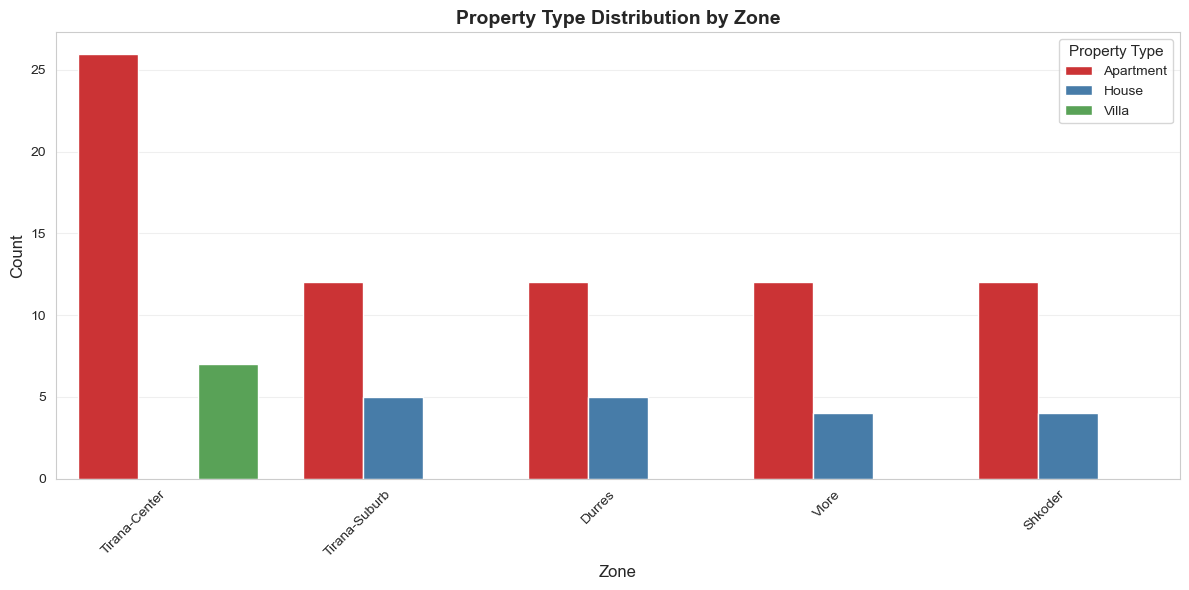

Property Type Counts by Zone:
Property_Type  Apartment  House  Villa
Zone                                  
Durres                12      5      0
Shkoder               12      4      0
Tirana-Center         26      0      7
Tirana-Suburb         12      5      0
Vlore                 12      4      0


In [28]:
# Create count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Zone', hue='Property_Type', palette='Set1')

# Customize
plt.xlabel('Zone', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Property Type Distribution by Zone', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Property Type', title_fontsize=11, fontsize=10)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary table
print("Property Type Counts by Zone:")
print(pd.crosstab(df['Zone'], df['Property_Type']))


## Tutorial Summary

### What We Accomplished

In this hands-on tutorial, we explored the Albania House Prices dataset through different visualizations, pracitcing both `Matplotlib` and `Seaborn` libraries. Each chart revealed unique insights about the real estate market while teaching specific visualization techniques.

### Matplotlib Visualizations (Graphs 1-5)

- **Histogram** - Revealed price distribution concentrated in the €70K-€130K range with luxury outliers  
- **Pie Chart** - Showed apartments dominate the market composition  
- **Bar Chart** - Identified Tirana-Center as the premium zone and Shkoder as most affordable  
- **Scatter Plot** - Demonstrated strong positive correlation between size and price  
- **Line Plot** - Uncovered depreciation trends with newer properties commanding premiums

### Seaborn Visualizations (Graphs 6-9)

- **Box Plot** - Compared price ranges across property types with statistical summaries  
- **Violin Plot** - Displayed distribution density shapes revealing multi-modal pricing in premium zones  
- **Heatmap** - Quantified correlations showing Size and Rooms as strongest price predictors  
- **Count Plot** - Mapped property type distribution across zones highlighting market diversity

### Market Insights Discovered

Location drives pricing with Tirana-Center commanding highest values. Property size strongly correlates with price. The market is apartment-heavy with limited luxury inventory. Newer properties attract premiums while older ones show depreciation. Regional zones offer affordability but lack property diversity.

This foundation prepares you to visualize any dataset effectively, choosing the right chart type and customization to communicate data-driven insights clearly.cate data-driven insights clearly.